# **Crime Cast- Forecasting Crime Categories**
------------------------------------------------

## **About the Dataset**

 
 ### **Feature Names :**
 
1. Location: Street address of the crime incident.
2. Cross_Street: Cross street of the rounded address.
3. Latitude: Latitude coordinates of the crime incident.
4. Longitude: Longitude coordinates of the crime incident.
5. Date_Reported: Date the incident was reported.
6. Date_Occurred: Date the incident occurred.
7. Time_Occurred: Time the incident occurred in 24-hour military time.
8. Area_ID: LAPD's Geographic Area number.
9. Area_Name: Name designation of the LAPD Geographic Area.
10. Reporting_District_no: Reporting district number.
11. Part 1-2: Crime classification.
12. Modus_Operandi: Activities associated with the suspect.
13. Victim_Age: Age of the victim.
14. Victim_Sex: Gender of the victim.
15. Victim_Descent: Descent code of the victim.
16. Premise_Code: Premise code indicating the location of the crime.
17. Premise_Description: Description of the premise code.
18. Weapon_Used_Code: Weapon code indicating the type of weapon used.
19. Weapon_Description: Description of the weapon code.
20. Status: Status of the case.
21. Status_Description: Description of the status code

### **Target Variable**

* Crime_Category: The category of the crime 

-------------------------------------------------------------------------

### Importing required modules and libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# sklearn
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# saving
import joblib

# models
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


### Loading the Data Using Pandas

In [2]:
train_crimes = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test_crimes = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')


### Examining  a sample of first 5 rows in the training and test data

In [3]:
train_crimes.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [4]:
test_crimes.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


## **Data Preprocessing**

In [5]:
train_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [6]:
train_crimes.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [7]:
#finding the number of duplicates 
train_crimes.duplicated().sum()

13

In [8]:
train_crimes  = train_crimes.drop_duplicates(keep='first')
train_crimes = train_crimes.dropna(how='all')

In [9]:
#printing the duplicated rows
train_crimes.loc[train_crimes.duplicated]

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category


In [10]:
train_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19987 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               19987 non-null  object 
 1   Cross_Street           3447 non-null   object 
 2   Latitude               19987 non-null  float64
 3   Longitude              19987 non-null  float64
 4   Date_Reported          19987 non-null  object 
 5   Date_Occurred          19987 non-null  object 
 6   Time_Occurred          19987 non-null  float64
 7   Area_ID                19987 non-null  float64
 8   Area_Name              19987 non-null  object 
 9   Reporting_District_no  19987 non-null  float64
 10  Part 1-2               19987 non-null  float64
 11  Modus_Operandi         17249 non-null  object 
 12  Victim_Age             19987 non-null  float64
 13  Victim_Sex             17365 non-null  object 
 14  Victim_Descent         17365 non-null  object 
 15  Premise

In [11]:
# check for NaN values
print(f"Count of NaN values in 'train_csv': {train_crimes.isna().sum().sum()} values")
print(f"Count of NaN values in 'test_csv': {test_crimes.isna().sum().sum()} values")

Count of NaN values in 'train_csv': 49841 values
Count of NaN values in 'test_csv': 12467 values


In [12]:
train_crimes.isna().sum()

Location                     0
Cross_Street             16540
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2738
Victim_Age                   0
Victim_Sex                2622
Victim_Descent            2622
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12657
Weapon_Description       12657
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [13]:
test_crimes.isna().sum()

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64

In [14]:
# Distribution of the crime categories, crimes over time

# train.csv
# Specify the date format
date_format = '%m/%d/%Y %I:%M:%S %p'  # Month/Day/Year Hour:Minute:Second AM/PM

# train.csv
# convert date columns to datetime with specified format
train_crimes['Date_Reported'] = pd.to_datetime(train_crimes['Date_Reported'], format=date_format)
train_crimes['Date_Occurred'] = pd.to_datetime(train_crimes['Date_Occurred'], format=date_format)

# extract year, month, day, and hour
train_crimes['Year_Reported'] = train_crimes['Date_Reported'].dt.year
train_crimes['Month_Reported'] = train_crimes['Date_Reported'].dt.month
train_crimes['Day_Reported'] = train_crimes['Date_Reported'].dt.day
train_crimes['Hour_Occurred'] = train_crimes['Time_Occurred'].apply(lambda x: int(x // 100))

# test.csv
# convert date columns to datetime with specified format
test_crimes['Date_Reported'] = pd.to_datetime(test_crimes['Date_Reported'], format=date_format)
test_crimes['Date_Occurred'] = pd.to_datetime(test_crimes['Date_Occurred'], format=date_format)

# extract year, month, day, and hour
test_crimes['Year_Reported'] = test_crimes['Date_Reported'].dt.year
test_crimes['Month_Reported'] = test_crimes['Date_Reported'].dt.month
test_crimes['Day_Reported'] = test_crimes['Date_Reported'].dt.day
test_crimes['Hour_Occurred'] = test_crimes['Time_Occurred'].apply(lambda x: int(x // 100))

Text(0, 0.5, 'Crime Category')

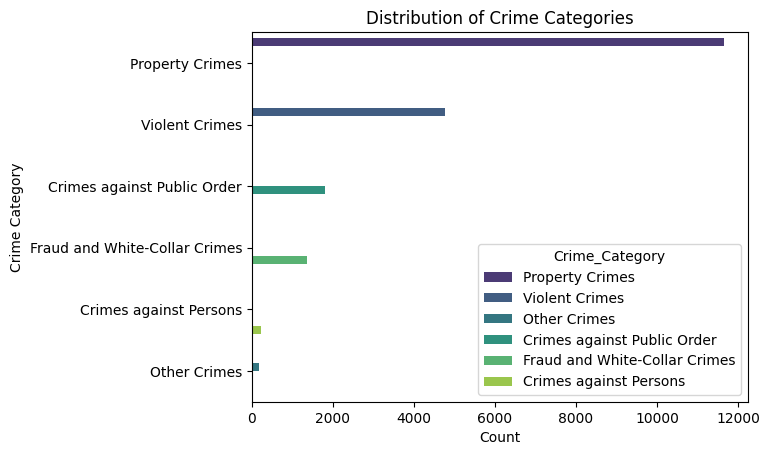

In [15]:
# distribution of crime categories
sns.countplot(y='Crime_Category', data=train_crimes, order=train_crimes['Crime_Category'].value_counts().index, palette='viridis', hue = train_crimes['Crime_Category'])
plt.title('Distribution of Crime Categories')
plt.xlabel('Count')
plt.ylabel('Crime Category')

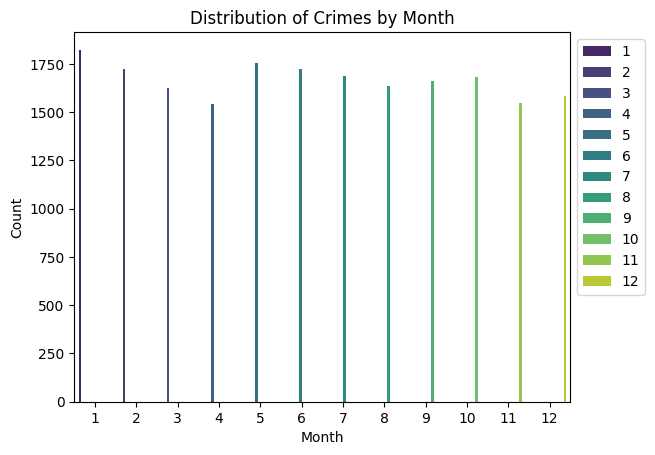

In [16]:
sns.countplot(x='Month_Reported', data=train_crimes, palette='viridis', hue='Month_Reported')
plt.title('Distribution of Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.show()


Text(0, 0.5, 'Count')

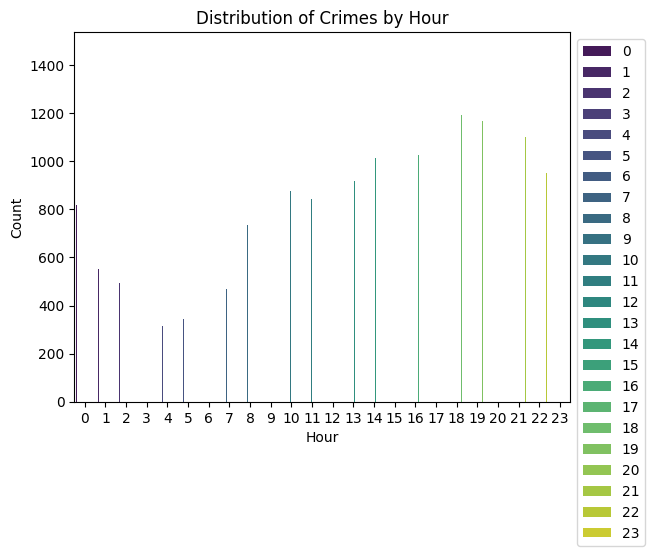

In [17]:
sns.countplot(x='Hour_Occurred', data=train_crimes, palette='viridis', hue = "Hour_Occurred")
plt.title('Distribution of Crimes by Hour')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.xlabel('Hour')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

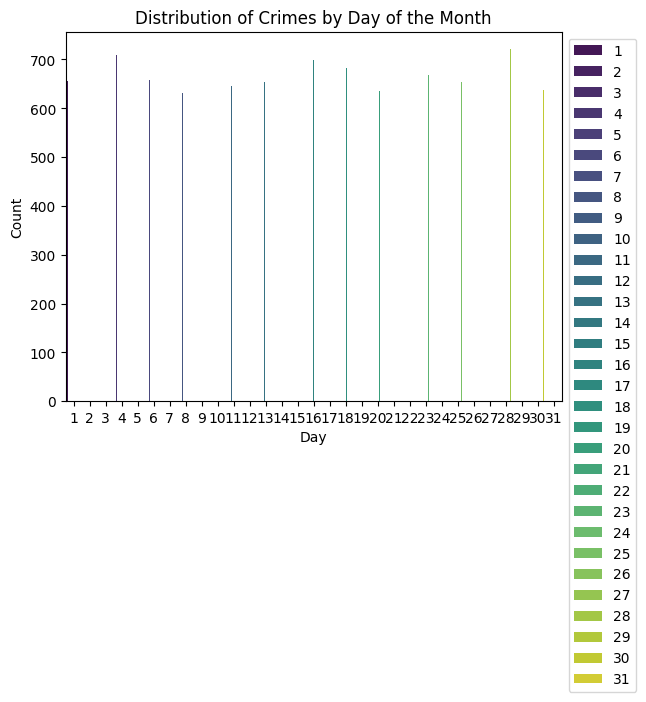

In [18]:
sns.countplot(x='Day_Reported', data=train_crimes, palette='viridis', hue = "Day_Reported")
plt.title('Distribution of Crimes by Day of the Month')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.xlabel('Day')
plt.ylabel('Count')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


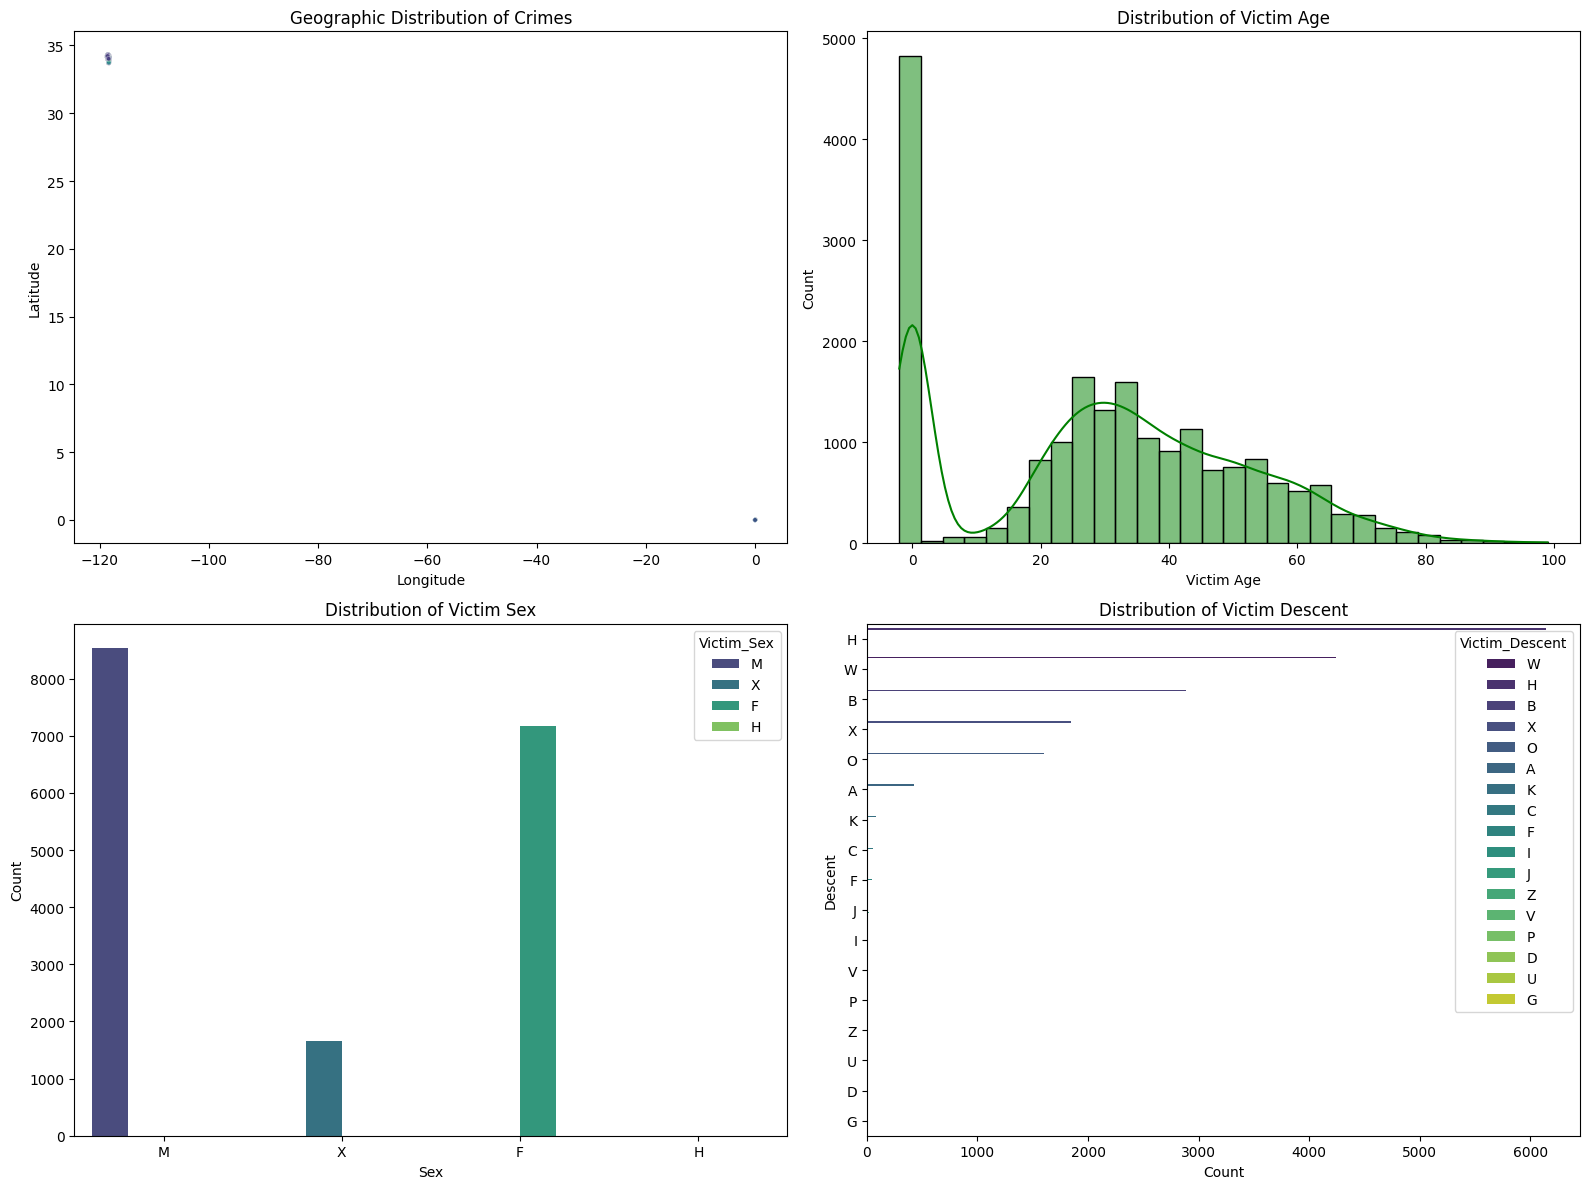

In [19]:
# Geographic distribution of crimes and analyze the demographic features of victims

# set up the matplotlib figure
plt.figure(figsize=(16, 12))

# geographic distribution of crimes
plt.subplot(2, 2, 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Crime_Category', data=train_crimes, palette='viridis', legend=None, s=10, alpha=0.5)
plt.title('Geographic Distribution of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# distribution of victim age
plt.subplot(2, 2, 2)
sns.histplot(train_crimes['Victim_Age'], bins=30, kde=True, color='green')
plt.title('Distribution of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Count')

# distribution of victim sex
plt.subplot(2, 2, 3)
sns.countplot(x='Victim_Sex', data=train_crimes, palette='viridis', hue = "Victim_Sex")
plt.title('Distribution of Victim Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# distribution of victim descent
plt.subplot(2, 2, 4)
sns.countplot(y='Victim_Descent', data=train_crimes, order=train_crimes['Victim_Descent'].value_counts().index, palette='viridis', hue = "Victim_Descent")
plt.title('Distribution of Victim Descent')
plt.xlabel('Count')
plt.ylabel('Descent')

plt.tight_layout()
plt.show()

### **Data Cleaning**

In [20]:
# Fill NaN values

# fill categorical columns with placeholders

# train.csv
train_crimes['Cross_Street'] = train_crimes['Cross_Street'].fillna('Unknown')
train_crimes['Modus_Operandi'] = train_crimes['Modus_Operandi'].fillna('Unknown')
train_crimes['Victim_Sex'] = train_crimes['Victim_Sex'].fillna('Unknown')
train_crimes['Victim_Descent'] = train_crimes['Victim_Descent'].fillna('Unknown')
train_crimes['Premise_Description'] = train_crimes['Premise_Description'].fillna('Unknown')
train_crimes['Weapon_Description'] = train_crimes['Weapon_Description'].fillna('Unknown')

# test.csv
test_crimes['Cross_Street'] = test_crimes['Cross_Street'].fillna('Unknown')
test_crimes['Modus_Operandi'] = test_crimes['Modus_Operandi'].fillna('Unknown')
test_crimes['Victim_Sex'] = test_crimes['Victim_Sex'].fillna('Unknown')
test_crimes['Victim_Descent'] = test_crimes['Victim_Descent'].fillna('Unknown')
test_crimes['Premise_Description'] = test_crimes['Premise_Description'].fillna('Unknown')
test_crimes['Weapon_Description'] = test_crimes['Weapon_Description'].fillna('Unknown')

# fill missing numerical values with the median values
train_crimes['Weapon_Used_Code'] = train_crimes['Weapon_Used_Code'].fillna(train_crimes['Weapon_Used_Code'].median())
test_crimes['Weapon_Used_Code'] = test_crimes['Weapon_Used_Code'].fillna(train_crimes['Weapon_Used_Code'].median())

In [21]:
# verify for NaN values
print(f"Count of NaN values in 'train_csv': {train_crimes.isna().sum().sum()} values")
print(f"Count of NaN values in 'test_csv': {test_crimes.isna().sum().sum()} values")

Count of NaN values in 'train_csv': 0 values
Count of NaN values in 'test_csv': 0 values


In [22]:
# Encode categorical features

label_encoders = {}
categorical_columns = ['Location', 'Cross_Street', 'Area_Name', 'Modus_Operandi', 
                           'Victim_Sex', 'Victim_Descent', 'Premise_Description', 
                           'Weapon_Description', 'Status', 'Status_Description']


for col in categorical_columns:
    labelE = LabelEncoder()
    train_crimes[col] = labelE.fit_transform(train_crimes[col])
    
    # handle unseen labels in test data
    test_crimes[col] = test_crimes[col].map(lambda s: '<unknown>' if s not in labelE.classes_ else s)
    labelE.classes_ = np.append(labelE.classes_, '<unknown>')
    test_crimes[col] = labelE.transform(test_crimes[col])
    
    # store the label encoder
    label_encoders[col] = labelE

In [23]:
# encode the target variable 'Crime_Category'
labelE_crime_category = LabelEncoder()
train_crimes['Crime_Category'] = labelE_crime_category.fit_transform(train_crimes['Crime_Category'])

In [24]:
# save the label encoder for later decoding
joblib.dump(labelE_crime_category, 'labelE_crime_category.pkl')

['labelE_crime_category.pkl']

In [25]:
# Scale numerical features

scaler = StandardScaler()
numerical_columns = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 
                     'Reporting_District_no', 'Part 1-2', 'Victim_Age', 
                     'Premise_Code', 'Weapon_Used_Code']

train_crimes[numerical_columns] = scaler.fit_transform(train_crimes[numerical_columns])
test_crimes[numerical_columns] = scaler.transform(test_crimes[numerical_columns])

In [26]:
# define features and target variable for training data
X_train = train_crimes.drop(columns=['Crime_Category', 'Date_Reported', 'Date_Occurred']).reset_index(drop=True)
y_train = train_crimes['Crime_Category'].reset_index(drop=True)

# prepare test data (assuming
X_test = test_crimes.drop(columns=['Date_Reported', 'Date_Occurred'])

# split the training data further into training and validation sets
#X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, val_index in split.split(X_train, y_train):
    X_train_split, X_val_split, y_train_split, y_val_split  = X_train.loc[train_index], X_train.loc[val_index],y_train.loc[train_index],y_train.loc[val_index]

print(X_train_split.shape, X_val_split.shape, y_train_split.shape, y_val_split.shape)
print(X_train_split.shape, X_val_split.shape, y_train_split.shape, y_val_split.shape)

(15989, 23) (3998, 23) (15989,) (3998,)
(15989, 23) (3998, 23) (15989,) (3998,)


## **Model Building**

### **Parameter Tuning**

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform

# Define the classifiers
lgbm = LGBMClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# Define the parameter distributions for LGBMClassifier
param_dist_lgbm = {
    'lgbm__num_leaves': randint(31, 51),
    'lgbm__learning_rate': uniform(0.05, 0.05),
    'lgbm__n_estimators': randint(100, 201)
}

# Define the parameter distributions for XGBClassifier
param_dist_xgb = {
    'xgb__max_depth': randint(3, 6),
    'xgb__learning_rate': uniform(0.05, 0.05),
    'xgb__n_estimators': randint(100, 201)
}

# Create the ensemble model
ensemble = VotingClassifier(estimators=[('lgbm', lgbm), ('xgb', xgb)], voting='soft')

# Combine the parameter distributions
param_dist = {**param_dist_lgbm, **param_dist_xgb}

# Perform RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(estimator=ensemble, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=0, random_state=42)
random_search.fit(X_train_split, y_train_split)

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

# Evaluate the best model on the validation set
best_model = random_search.best_estimator_
y_val_pred = best_model.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)
print("Validation accuracy: ", val_accuracy)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2346
[LightGBM] [Info] Number of data points in the train set: 12791, number of used features: 23
[LightGBM] [Info] Start training from score -4.486684
[LightGBM] [Info] Start training from score -2.402911
[LightGBM] [Info] Start training from score -2.692612
[LightGBM] [Info] Start training from score -4.711565
[LightGBM] [Info] Start training from score -0.539052
[LightGBM] [Info] Start training from score -1.434256
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2343
[LightGBM] [Info] Number of dat

In [28]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the classifiers with the best parameters
lgbm = LGBMClassifier(
    learning_rate=0.076984606619454,
    n_estimators=123,
    num_leaves=43,
    random_state=42
)

xgb = XGBClassifier(
    learning_rate=0.057046211248738134,
    max_depth=5,
    n_estimators=144,
    random_state=42
)

# Create the ensemble model
ensemble = VotingClassifier(
    estimators=[('lgbm', lgbm), ('xgb', xgb)],
    voting='soft'
)

# Train the ensemble model
ensemble.fit(X_train_split, y_train_split)

# Evaluate the model on the validation set
y_val_pred = ensemble.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)

print("Validation accuracy: ", val_accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2371
[LightGBM] [Info] Number of data points in the train set: 15989, number of used features: 23
[LightGBM] [Info] Start training from score -4.486699
[LightGBM] [Info] Start training from score -2.403100
[LightGBM] [Info] Start training from score -2.692166
[LightGBM] [Info] Start training from score -4.716812
[LightGBM] [Info] Start training from score -0.538988
[LightGBM] [Info] Start training from score -1.434272
Validation accuracy:  0.9179589794897449


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate the model on the validation set
y_val_pred = ensemble.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)
val_precision = precision_score(y_val_split, y_val_pred, average='weighted')
val_recall = recall_score(y_val_split, y_val_pred, average='weighted')
val_f1 = f1_score(y_val_split, y_val_pred, average='weighted')

print("Validation Accuracy: ", val_accuracy)
print("Validation Precision: ", val_precision)
print("Validation Recall: ", val_recall)
print("Validation F1 Score: ", val_f1)

print("\nClassification Report:\n", classification_report(y_val_split, y_val_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val_split, y_val_pred)

Validation Accuracy:  0.9179589794897449
Validation Precision:  0.9158876528886077
Validation Recall:  0.9179589794897449
Validation F1 Score:  0.9154049227647356

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.53      0.61        45
           1       0.80      0.78      0.79       362
           2       0.92      0.92      0.92       271
           3       0.33      0.08      0.13        36
           4       0.97      0.95      0.96      2332
           5       0.85      0.94      0.89       952

    accuracy                           0.92      3998
   macro avg       0.76      0.70      0.72      3998
weighted avg       0.92      0.92      0.92      3998



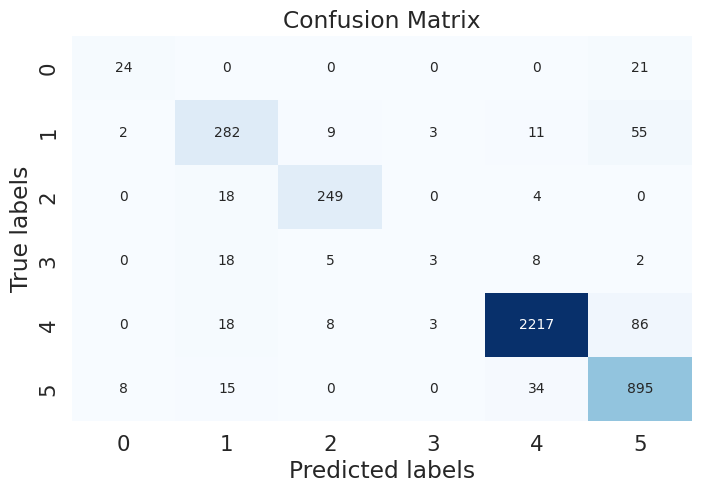

In [30]:
# Plot confusion matrix
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 10}, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [31]:
y_train_pred = ensemble.predict(X_train)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred)}")

Training Accuracy: 0.9775353980087057


In [32]:
# predict on test data
y_test_pred = ensemble.predict(X_test)

In [33]:
# decode the predictions for submission
labelE_crime_category = joblib.load('labelE_crime_category.pkl')
y_test_pred_decoded = labelE_crime_category.inverse_transform(y_test_pred)
y_test_pred_decoded

array(['Violent Crimes', 'Property Crimes', 'Crimes against Public Order',
       ..., 'Violent Crimes', 'Violent Crimes', 'Property Crimes'],
      dtype=object)

### **Dummy Classifier** 

In [34]:
# constructing the feature matrix and target label vector from the training data 
X = train_crimes.drop('Crime_Category', axis = 'columns')
y = train_crimes['Crime_Category']

# splitting the training data into training set and validation set 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)


model = DummyClassifier(strategy = 'most_frequent')
model.fit(X_train, y_train)



DummyClassifier(strategy='most_frequent')

In [35]:
y_pred =model.predict(X_test)

In [36]:
y_pred

array([4, 4, 4, ..., 4, 4, 4])

### **Submission**

In [37]:
test_crimes.reset_index(drop=True, inplace=True)
submission = pd.DataFrame({'ID':test_crimes.index + 1, 'Crime_Category': y_test_pred_decoded})
submission.to_csv('submission.csv', index = False)

#submission.head() 